<a href="https://colab.research.google.com/github/wizard339/education/blob/main/misis/cv/image_processing_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# В основном про skimage

## Input/output, data types and colorspaces

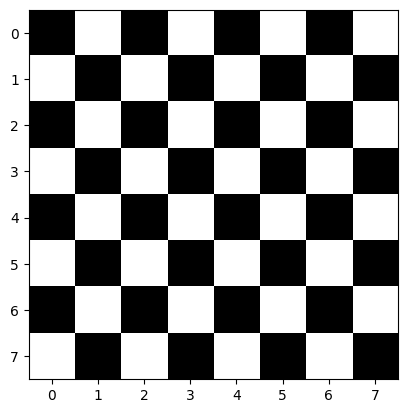

In [ ]:
import numpy as np
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest') 

In [ ]:
import skimage
from skimage import data  # most functions are in subpackages

In [ ]:
camera = data.camera()
camera.dtype

camera.shape

from skimage import filters
filtered_camera = filters.gaussian(camera, 1)
type(filtered_camera) 

numpy.ndarray

In [ ]:
from skimage import io

In [ ]:
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

In [ ]:
logo = io.imread('http://scikit-image.org/_static/img/logo.png')

In [ ]:
io.imsave('local_logo.png', logo)

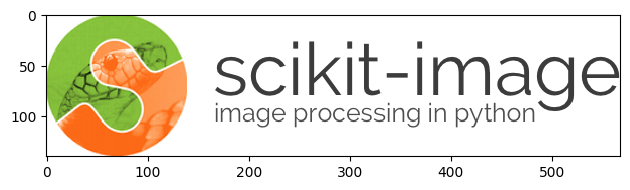

In [ ]:
io.imshow(logo)

In [ ]:
camera = data.camera()
print(camera.dtype)

camera_multiply = 3 * camera


uint8


In [ ]:
import matplotlib.pyplot as plt

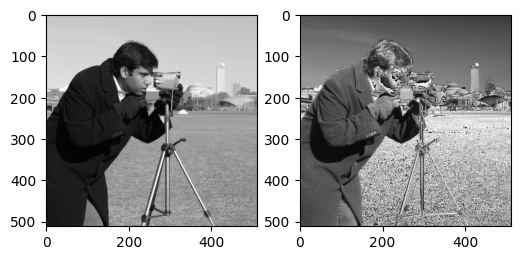

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(camera, cmap='gray')
plt.subplot(122)
plt.imshow(camera_multiply, cmap='gray')
plt.show()

In [ ]:
from skimage import img_as_float
camera_float = img_as_float(camera)
camera.max(), camera_float.max()

(255, 1.0)

In [ ]:
from skimage import filters
camera_sobel = filters.sobel(camera)
camera_sobel.max() 

0.6447887988758096

(array([0.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 1.000e+01, 7.000e+00,
        1.000e+01, 2.700e+01, 1.600e+01, 1.400e+01, 1.700e+01, 1.300e+01,
        1.300e+01, 1.900e+01, 1.300e+01, 1.800e+01, 2.900e+01, 4.800e+01,
        6.800e+01, 9.600e+01, 1.200e+02, 1.730e+02, 2.390e+02, 3.190e+02,
        4.460e+02, 5.560e+02, 6.400e+02, 7.560e+02, 7.860e+02, 8.770e+02,
        9.650e+02, 1.069e+03, 1.061e+03, 1.149e+03, 1.186e+03, 1.147e+03,
        1.264e+03, 1.195e+03, 1.160e+03, 1.179e+03, 1.142e+03, 1.197e+03,
        1.154e+03, 1.163e+03, 1.089e+03, 1.085e+03, 1.100e+03, 1.061e+03,
        1.026e+03, 1.110e+03, 1.028e+03, 1.022e+03, 1.031e+03, 9.700e+02,
        1.003e+03, 1.023e+03, 9.710e+02, 9.560e+02, 9.880e+02, 9.010e+02,
        9.380e+02, 8.530e+02, 8.500e+02, 8.390e+02, 7.890e+02, 8.460e+02,
        8.050e+02, 8.290e+02, 8.280e+02, 8.470e+02, 8.570e+02, 8.220e+02,
        7.690e+02, 7.900e+02, 7.160e+02, 7.050e+02, 6.950e+02, 6.640e+02,
        6.640e+02, 6.210e+02, 6.000e+0

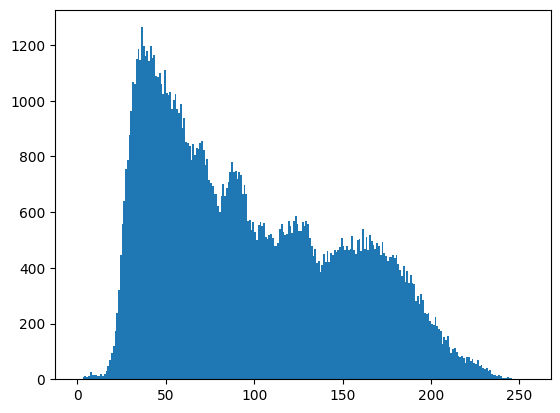

In [ ]:
from skimage import feature
from skimage import measure

image = data.coins()
plt.hist(image.flat, bins=np.arange(256))

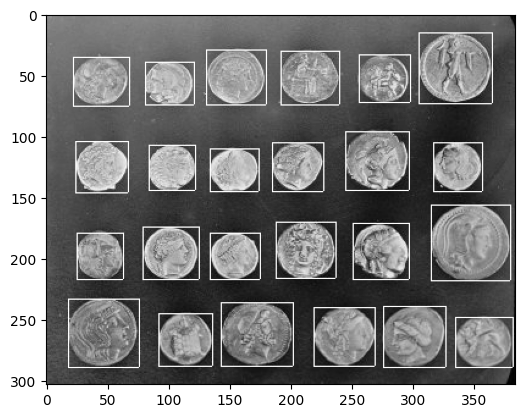

In [ ]:
edges = feature.canny(image, sigma =3, low_threshold=10, high_threshold=80)
label_image = measure.label(edges)
image_copy = image.copy()
for region in measure.regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    image_copy[minr:maxr, (minc, maxc)] = 255
    image_copy[(minr, maxr ), minc:maxc] = 255
plt.imshow(image_copy, cmap='gray')


## Mathematical morphology

In [ ]:
from skimage import morphology
morphology.diamond(1)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

Erosion = minimum filter. Replace the value of a pixel by the minimal value covered by the structuring element

In [ ]:
a = np.zeros((7,7), dtype=np.uint8)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
#Erosion removes objects smaller than the structure
morphology.binary_erosion(a, morphology.diamond(2)).astype(np.uint8)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

Dilation: maximum filter:

In [ ]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

Opening: erosion + dilation.

Opening removes small objects and smoothes corners.

In [ ]:
a = np.zeros((5,5), dtype='int')
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
morphology.binary_opening(a, morphology.diamond(1)).astype(np.uint8)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

# Основы про работу с изображениями

In [ ]:
# импортируем имеющиеся в библиотеке skimage фотографии
from skimage import data
 
import matplotlib.pyplot as plt
import numpy as np

### Черно-белые изображения

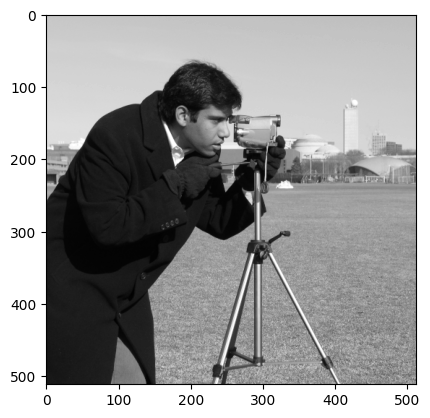

In [ ]:
# импортируем черно-белую фотографию
camera_img = data.camera()
 
# воспользуемся функцией imshow для показа изображения
plt.imshow(camera_img, cmap = 'gray')

По умолчанию, imshow преобразует черно-белые фото в цветные. Чтобы этого избежать, нужно указать параметр цветовой схемы cmap = ‘gray’.

In [ ]:
# посмотрим на тип данных
type(camera_img)

numpy.ndarray

In [ ]:
# размерность (вертикаль х горизонталь)
camera_img.shape

(512, 512)

In [ ]:
# 512 х 512
camera_img.size

262144

Мы можем вывести тип значения нашей матрицы, общий диапазон оттенков, а также значение (оттенок) конкретного пикселя.

In [ ]:
# каждое значение состоит из целых чисел длиной 8 бит
camera_img.dtype

dtype('uint8')

In [ ]:
# диапазон этого значения (т.е. оттенков), как мы и говорили, от черного (0) до белого (255)
camera_img.min(), camera_img.max()

(0, 255)

In [ ]:
# задав координаты конкретного пикселя, мы можем посмотреть его оттенок
camera_img[50,50]

207

Для того чтобы вывести этот оттенок на экран, воспользуемся библиотекой PIL (Python Imaging Library).

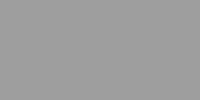

In [ ]:
# посмотрим, что это за цвет, создав картинку в библиотеке PIL
from PIL import Image
 
# mode = 'L' указывает, что это ч/б изображение, размером 200 х 100
# и оттенком серого как раз 158
sample1 = Image.new(mode = 'L', size = (200, 100), color = 158)
sample1

### Цветные изображения

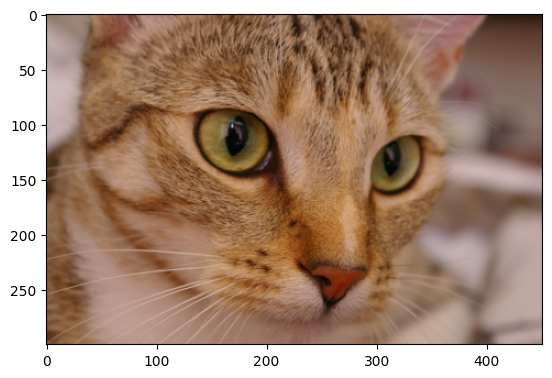

In [ ]:
# импортируем цветную фотографию
cat_img = data.chelsea()
 
# и выведем ее на экран
plt.imshow(cat_img)

В данном случае измерений у массива Numpy уже три, координата по вертикали, по горизонтали и слой. Значениями будет интенсивность каждого из трёх цветов (также от 0 до 255).

In [ ]:
# посмотрим на размерность
cat_img.shape

(300, 451, 3)

In [ ]:
# аналогично черно-белому изображению, мы можем посмотреть оттенки красного, зелёного и синего конкретного пикселя
cat_img[50, 50]

array([138,  98,  63], dtype=uint8)

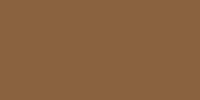

In [ ]:
# опять же воспользуемся PIL для визуализации этого цвета
sample2 = Image.new(mode = "RGB", size = (200, 100), color = (138,  98,  63))
sample2

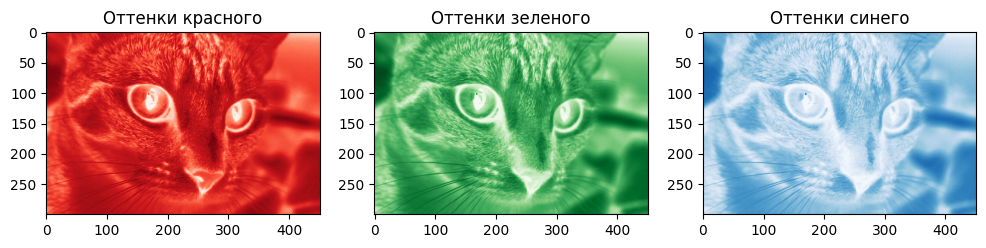

In [ ]:
# функция subplots дает возможность вывести сразу несколько изображений
# в качестве параметров передаем количество строк и столбцов сетки изображений (1 x 3)
# и размер графиков
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
 
# и выводим каждое изображение по отдельности
 
# сначала только красные оттенки, слой [0]
# также нужно принудительно задать cmap = 'Reds'
ax[0].imshow(cat_img[:,:,0], cmap='Reds')
# также зададим заголовок
ax[0].set_title('Оттенки красного')
 
# потом только зеленые, слой [1]
ax[1].imshow(cat_img[:,:,1], cmap='Greens')
ax[1].set_title('Оттенки зеленого')
 
# и наконец только синие, слой [2]
ax[2].imshow(cat_img[:,:,2], cmap='Blues')
ax[2].set_title('Оттенки синего');

Если эти картинки наложить друг на друга, мы восстановим исходное изображение.

### Гистограмма

Как чёрно-белое, так и цветное изображение можно визуализировать с помощью гистограммы. По горизонтали будут отложены оттенки от 0 до 255, а по вертикали количество пикселей каждого из оттенков. Начнем с черно-белого.

In [ ]:
# воспользуемся еще одной библиотекой популярной библиотекой OpenCV
import cv2
 
# и создадим гистограмму с помощью calcHist
hist_gray = cv2.calcHist([camera_img], [0], None, [256], [0, 256])

Функции calcHist мы передаем следующие параметры:

* image: само изображение [camera_img]
* channels: для ч/б фотографии это [0]
* mask: так как мы строим гистограмму всего изображения, то фильтр или срез (mask) равен None
* histSize: количество интервалов (bins) [256]
* ranges: диапазон оттенков [0,256]

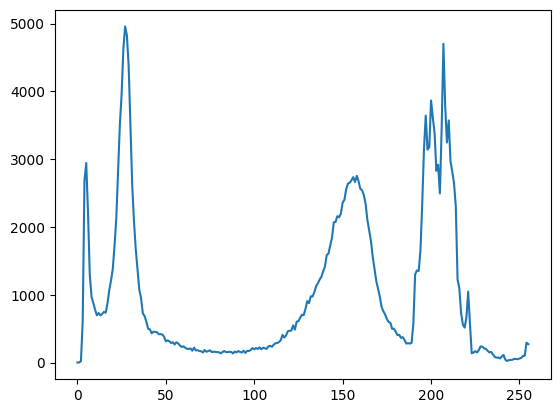

In [ ]:
plt.plot(hist_gray)

Аналогичным образом создадим гистограмму цветного изображения.

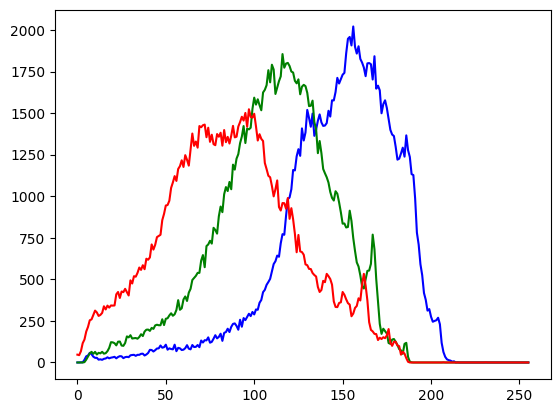

In [ ]:
# цветной гистограмме мы передадим параметры в формате "синий, зеленый, красный"
color = ('b','g','r')
 
# в цикле for пройдемся по цветам ('b','g','r') 
# и соответствующим каналам [0, 1, 2] с помощью enumerate
for channel, col in enumerate(color):
 
    # здесь параметры схожи, только каналов теперь три
    hist_color = cv2.calcHist([cat_img], [channel], None, [256], [0, 256])
 
    # строим на каждой итерации цикла по кривой и берем для нее цвет из color
    plt.plot(hist_color, color=col)

Гистограмма может использоваться, например, при поиске порогового значения (threshold) в процессе обработки изображения (об этом ниже).

### Обработка изображений

Начнем с простых операций. Например, мы можем вырезать часть изображения по координатам.

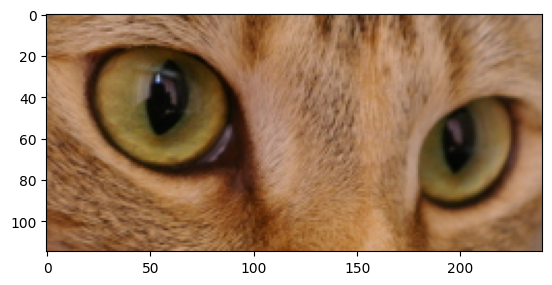

In [ ]:
# например, покажем только глаза кошки
eyes = cat_img[70:185, 115:355]
plt.imshow(eyes)

Кроме того, мы можем изменить цвет конкретного пикселя или закрасить целую область.

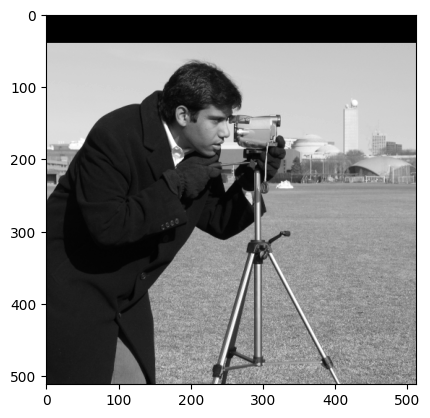

In [ ]:
# например, создать черную полосу, задав цвет 0 (черный) первым 40 строкам массива
camera_img[:40] = 0
plt.imshow(camera_img, cmap = 'gray')

Также ожидаемо библиотека skimage позволяет преобразовывать цветные изображения в черно-белые.

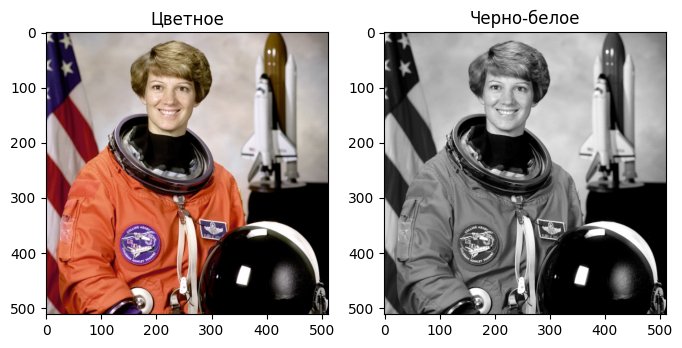

In [ ]:
# библиотека skimage также позволяет преобразовывать цветные изображения в черно-белые
from skimage.color import rgb2gray
 
# импортируем еще одно фото из библиотеки
color_img = data.astronaut()
 
# воспользуемся функцией rgb2gray
grayscale_img = rgb2gray(color_img)
 
# снова возьмем уже знакомую функцию subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
 
# выведем первое изображение и зададим заголовок
ax[0].imshow(color_img)
ax[0].set_title('Цветное')
 
# для ч/б изображения не забудем про параметр cmap = 'gray'
ax[1].imshow(grayscale_img,  cmap='gray')
ax[1].set_title('Черно-белое')
 
plt.show()

In [ ]:
# проверим
print (color_img.shape, grayscale_img.shape)

(512, 512, 3) (512, 512)


Так как наши изображения не что иное, как матрицы, мы можем применять к ним матричные вычисления и благодаря этому трансформировать их. В частности, матрицы можно транспонировать (т.е. каждую строчку исходной матрицы записать в виде столбцов в том же порядке).

Если транспонировать первые две оси цветного изображения (не трогая при этом третью, цветовую ось) картинка повернется.

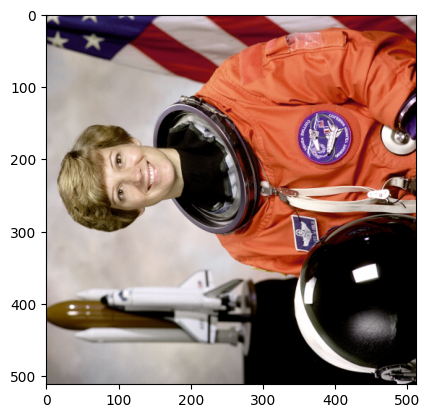

In [ ]:
# по большому счету, меняем местами 0 и 1
color_img = np.transpose(color_img, (1, 0, 2))
plt.imshow(color_img)

Помимо этого, решая задачи сегментации изображения (то есть выделения однородных областей, image segmentation), мы можем применить пороговое преобразование (image thresholding). Например, для того чтобы разделить передний и задний план изображения.

На практике мы задаем некий порог, и все пиксели, значение (оттенок) которых ниже порога, делаем черными, а выше — белыми. Таким образом, мы создаем по-настоящему черно-белое изображение (binary image).

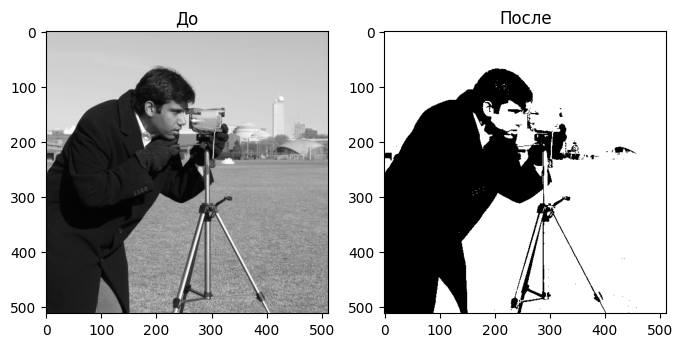

In [ ]:
# вновь импортируем ч/б изображение
camera_img_2 = data.camera()
 
# если значение пикселя ниже 87, сделаем его черным, выше - белым
binary = camera_img_2 > 87
 
# теперь сравним исходное изображение и изображение после преобразования
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
 
# выведем первое изображение и зададим заголовок
ax[0].imshow(camera_img_2,  cmap = 'gray')
ax[0].set_title('До')
 
# для ч/б изображения не забудем про параметр cmap = 'gray'
ax[1].imshow(binary,  cmap = 'gray')
ax[1].set_title('После')
 
plt.show()

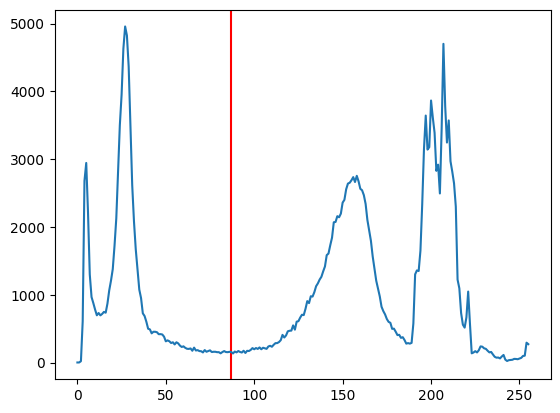

In [ ]:
# воспользуемся уже известной функцией calcHist
t_hist = cv2.calcHist([camera_img_2], [0], None, [256], [0, 256])
# и добавим прямую с пороговым значением красного цвета
plt.axvline(87, color = 'r')
plt.plot(t_hist)